In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# 데이터 읽어오기
df = pd.read_csv('vgames2_clean2.csv', index_col='Unnamed: 0')

In [24]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [28]:
def perPlot(df:pd.DataFrame, groupKeys:list[str], kind:str, valueKeys:list[str]):
    plot = []
    # indexer = True if len(groupKeys) == 1 else False
    indexer = True

    for vKey in valueKeys:
        fig, ax = plt.subplots(figsize=(15, 5))

        data = df.groupby(groupKeys[0], as_index=indexer)[vKey].mean() # 평균용
        # print(data)

        if kind == 'plot':
            plt.plot(data, label=vKey)
        elif kind == 'bar':
            plt.bar(data.index, data, label=vKey)
        elif kind == 'scatter':
            plt.scatter(data.index, data, label=vKey)

        plt.xlabel(groupKeys[0])
        plt.ylabel('selling rate(k)')
        
        plt.legend(loc='upper right')

        plot.append(fig)

    return plot

In [29]:
def totalPlot(df:pd.DataFrame, groupKeys:list[str], kind:str, valueKeys:list[str]):
    plot = []
    # indexer = True if len(groupKeys) == 1 else False
    indexer = True

    fig, ax = plt.subplots(figsize=(15, 5))

    # print(df.groupby(['Year', 'Genre']).count()['EU_Sales'].unstack().plot(ax=ax))

    # print(df.groupby(['Year', 'Genre']).mean()['EU_Sales'].unstack().plot(ax=ax, kind='bar'))

    # 분류할 데이터 컬럼별 연산처리
    for vKey in valueKeys:
        data = df.groupby(groupKeys[0])[vKey].mean() # 평균용
        # data = df.groupby(groupKeys[0], as_index=indexer)[vKey].mean() # 평균용

        # print(type(data)) # 최종은 Series가 되어야 함
        # print(df.groupby(groupKeys[0])) # DataFrameGroupBy
        # print(df.groupby(groupKeys[0]).get_group(1980)) # DataFrame

        if kind == 'plot':
            plt.plot(data, label=vKey)
        elif kind == 'bar':
            plt.bar(data.index, data, label=vKey)
        elif kind == 'scatter':
            plt.scatter(data.index, data, label=vKey)

    
    

    plt.xlabel(groupKeys[0])
    plt.ylabel('selling rate(k)')
    
    plt.legend(loc='upper right')

    plot.append(fig)

    return plot

In [30]:
#----------------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------------
def grouping(df:pd.DataFrame, groupKeys:list[str], kind='plot', valueKeys = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], showOption = 'total'):
    df1 = df.groupby(groupKeys, as_index=False)
    plots = []

    # keys = df1.groups.keys()
    # print(keys)
    # print(df1.get_group((1980, 'Action'))['NA_Sales'].mean())
    # 시리즈는 받는다
    # print(df.groupby(groupKeys)['NA_Sales'].mean())

    if len(groupKeys) == 1:
        if showOption == 'total':
            plots = totalPlot(df, groupKeys, kind, valueKeys)
        elif showOption == 'per':
            plots = perPlot(df, groupKeys, kind, valueKeys)
    else:
        plots = totalPlot(df, groupKeys, kind, valueKeys)
        # plots = perPlot(df, groupKeys, kind, valueKeys)

    for plot in plots:
        plot.show()
    
# grouping(df, groupKeys=['Year', 'Genre'], kind='plot', showOption='total')
# grouping(df, groupKeys=['Year', 'Genre'], kind='bar', showOption='total', valueKeys=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

C:\Users\rimmo\AppData\Local\Temp\ipykernel_37784\3293176663.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.show()


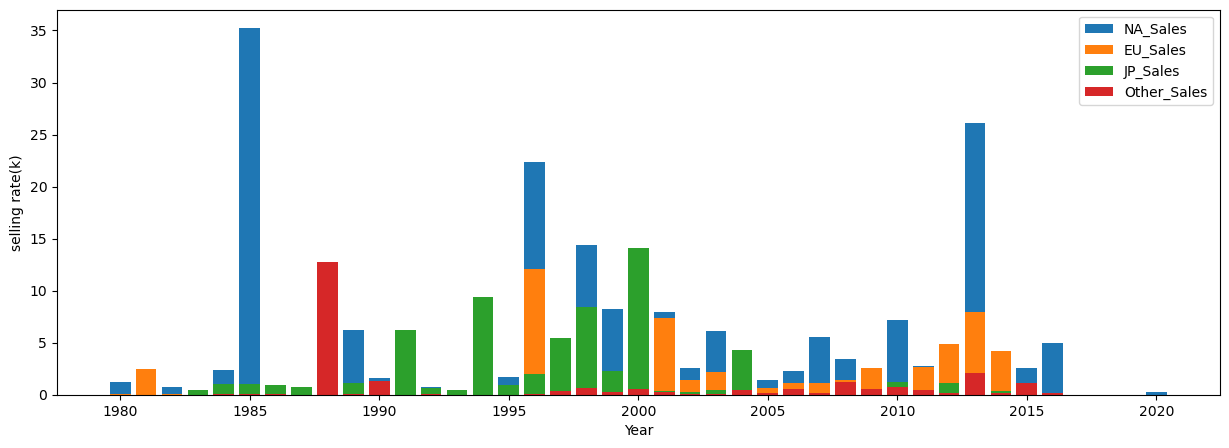

In [31]:
# grouping 메서드 옵션
# kind : plot, bar, scatter
# showOption : total, per
# 연도별 판매량
# 1985, 1996, 2013년의 NA 판매량이 뜀
grouping(df, groupKeys=['Year'], kind='bar', showOption='total')

C:\Users\rimmo\AppData\Local\Temp\ipykernel_37784\3293176663.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.show()


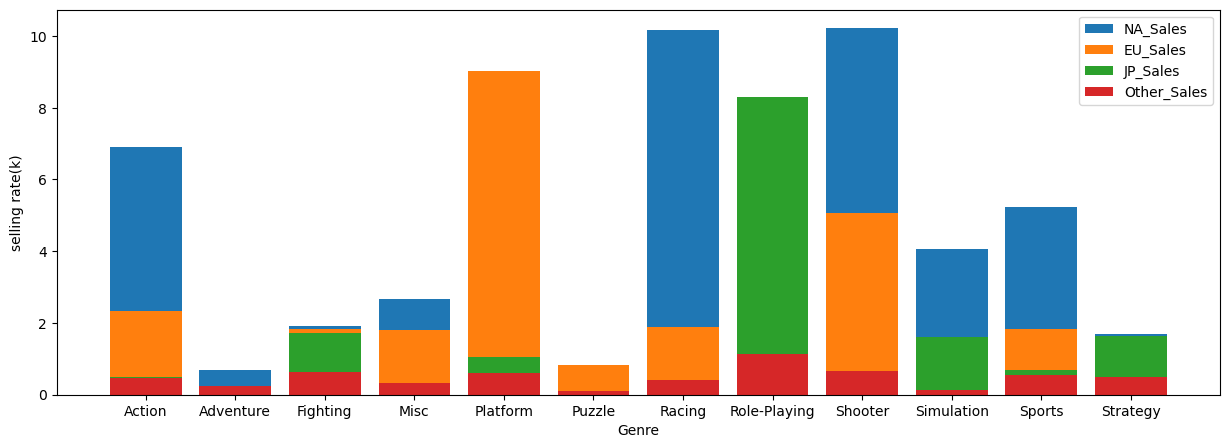

In [32]:
# Action, Racing, Shooter, Simulation, Sports 장르에서 NA_Sales 판매량이 두드러짐
# Platform, Shooter 장르에서 EU_Sales 판매량이 두드러짐
# Role-Playing, Fighting, Simulation, Strategy 장르에서 JP_Sales 판매량이 두드러짐
grouping(df, groupKeys=['Genre'], kind='bar', showOption='total')

C:\Users\rimmo\AppData\Local\Temp\ipykernel_37784\3293176663.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.show()


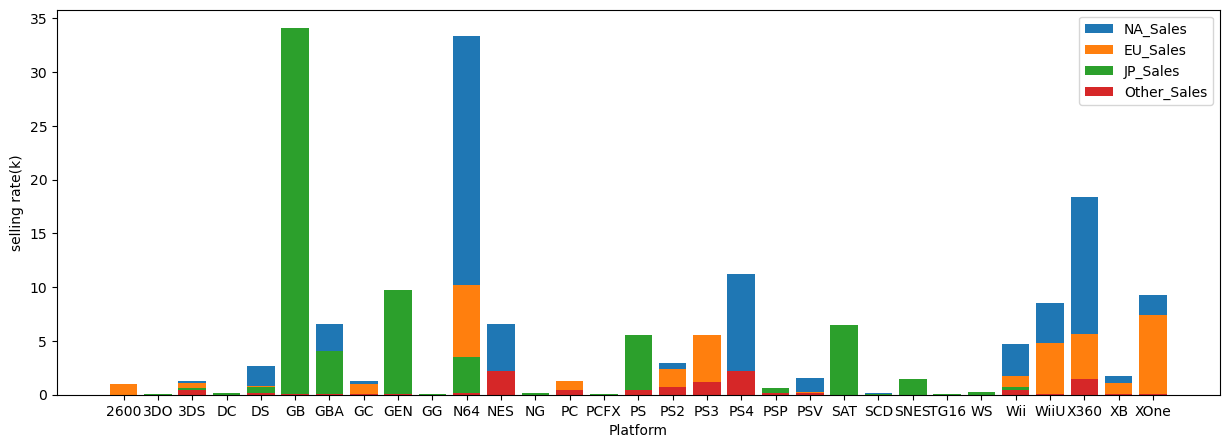

In [33]:
# 총 판매량에서
# GB는 JP에서 압도적으로 많이 팔림
# N64는 NA에서 압도적으로 팔림
# PS4, X360은 NA에서 압도적으로 팔림
grouping(df, groupKeys=['Platform'], kind='bar', showOption='total')

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
df.groupby(['Year', 'Genre']).count()['EU_Sales'].unstack().plot(ax=ax)
# df.groupby(['Year', 'Genre']).mean()['EU_Sales'].unstack().plot(ax=ax)

In [ ]:
df[df['Platform'] == 'XOne']

In [ ]:
# grouping 메서드 옵션
# kind : plot, bar, scatter
# showOption : total, per
# 연도별 판매량
# 1985, 1996, 2013년의 NA 판매량이 뜀
# grouping(df, groupKeys=['Year'], kind='bar', showOption='total')

# Action, Racing, Shooter, Simulation, Sports 장르에서 NA_Sales 판매량이 두드러짐
# Platform, Shooter 장르에서 EU_Sales 판매량이 두드러짐
# Role-Playing, Fighting, Simulation, Strategy 장르에서 JP_Sales 판매량이 두드러짐
# grouping(df, groupKeys=['Genre'], kind='bar', showOption='total')

# 총 판매량에서
# GB는 JP에서 압도적으로 많이 팔림
# N64는 NA에서 압도적으로 팔림
# PS4, X360은 NA에서 압도적으로 팔림
# grouping(df, groupKeys=['Platform'], kind='bar', showOption='total')


# grouping(df, groupKeys=['Year', 'Genre'], kind='bar', showOption='total')

# df.groupby(['Year', 'Genre'], as_index=False).mean()

In [479]:
df1 = df.groupby(['Year'], as_index=False)

# df1.min() # 최소
# df1.max() # 최대
# df1.mean() # 평균
# df1.median() # 중앙값
# df1.get_group(1981).mode() # 최빈값
# df1.std() # 표준편차
# df1.var() # 분산
# df1.mad() # 평균절대편차
# df1.cummin() # 누적 최소
# df1.cummax() # 누적 최대
# df1.cumsum() # 누적합
# df1.cumprod() # 누적곱
# df1.quantile() # 분위수

## 심화
# df1.cov() # 공분산
# df1.get_group(1981).kurt() # 첨도
# df1.sem() # 표준오차
# df1.skew() # 왜도 / 비대칭도

# df1.corr() # 상관계수(corr) # 두 변수간 관계성 표현에 사용 # 매우 중요할듯
# df1.corr(method='pearson') # 피어슨 상관계수 (+1 가까울수록 양의 상관관계), (-1 가까울수록 음의 상관관계)
# df1.corr(method='kendall') # 켄달-타우 상관계수 (두 변수간의 연관성 계산, 예) 순위 데이터의 흐름이 두 변수가 유사하다 )
# df1.corr(method='spearman') # 스피어먼 상관계수 (두 변수간 순위 계산, 같으면 1에 가까움, 다르면 -1에 가까움)

# plt.plot(df.groupby('Year')['NA_Sales'].mean())
# plt.show()

print('사용 계산식들 모음')


사용 계산식들 모음


In [ ]:
# 테스트 코드
df1 = df.groupby(['Year'], as_index=False)
df1
# df1.boxplot()
# df1['NA_Sales'].mean()

# # 1980 연도 데이터 모아오기
# df.groupby(['Year'], as_index=False).get_group(1980)

# # 1981
# df.groupby(['Year'], as_index=False).get_group(1981)

# 1985
# df.groupby(['Year'], as_index=False).get_group(1985)


# 3 실행할 